The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
[ 9.20399726  8.59693475 10.          1.        ]
[10.79295456 11.4199852  10.          1.        ]
[ 9.99921222 10.00919553 10.          1.        ]
[-0.79600274 -1.40306525  1.          1.        ]
[0.79295456 1.4199852  1.         1.        ]
[-7.87781739e-04  9.19552784e-03  1.00000000e+00  1.00000000e+00]


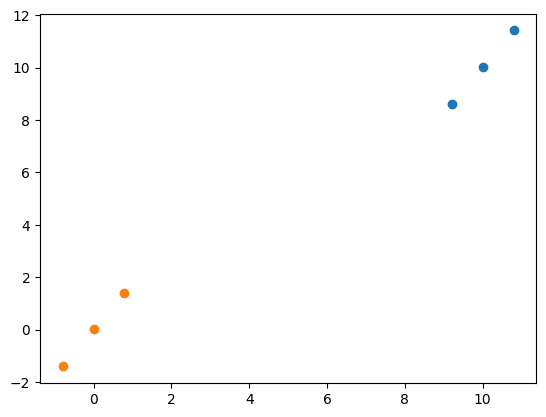

In [11]:
%load_ext autoreload
%autoreload 2
from banners import *
import numpy as np
import matplotlib.pyplot as plt

scaling_factor = 1E6

# robot_translation = np.array([0, 0, 1])
# q = np.array([0, 0, 0, 1])
# robot_rotation = R.from_quat([0, 0, 0, 1]).as_matrix()
k0_offset = np.array([[1, 0, 0, 0.48],
                     [0, 1, 0, -0.53],
                     [0, 0, 1, 1],
                     [0, 0, 0, 1]])
robot_pose = np.array([[1, 0, 0, 10],
                       [0, 1, 0, 10],
                       [0, 0, -1, 10],
                       [0, 0, 0, 1]])
other_robot_pose = np.array([[1, 0, 0, 0],
                       [0, 1, 0, 0],
                       [0, 0, -1, 1],
                       [0, 0, 0, 1]])

cc = CameraCombo(None)
rgb_ground_points = cc.visionCone(PI_W, PI_H, k0_offset@robot_pose, rbg_K)
rgb_ground_points2 = cc.visionCone(PI_W, PI_H, k0_offset@other_robot_pose, rbg_K)

plt.scatter(rgb_ground_points[:,0], rgb_ground_points[:,1])
plt.scatter(rgb_ground_points2[:,0], rgb_ground_points2[:,1])


[-1.27600274 -0.87306525  1.        ]
[-0.48078778  0.53919553  1.        ]
[0.31442718 1.95145631 1.        ]


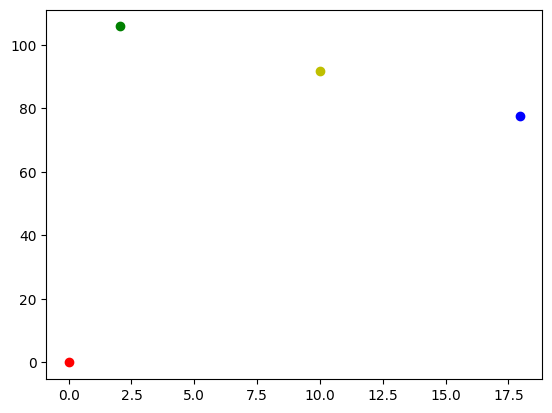

In [55]:
import matplotlib.pyplot as plt

K_0 = np.array([679.0616691224743, 0.0, 866.4845535612815, 0.0, 679.7611413287517, 593.4758325974849, 0.0, 0.0, 1.0]).reshape((3, 3))
K_1 = np.array([677.6841664243713, 0.0, 927.0775869012278, 0.0, 678.3384456258163, 545.5178145289105, 0.0, 0.0, 1.0]).reshape((3, 3))


def crying(u, v, K, offset, pose, scale):
    uv = np.array([u, v, 1]).T
    world = np.linalg.inv(K)@uv
    print(world)
    world = offset@world.T
    world *= scale

    # print(world)
    world = pose@np.concatenate((world, np.array([1]))).T
    
    return world
# rgb_ground_points = np.concatenate((rgb_ground_points, np.expand_dims(world, axis=1)), axis=0)

robot_pose = np.array([[1, 0, 0, 10],
                       [0, 1, 0, 100],
                       [0, 0, 1, 1],
                       [0, 0, 0, 1]])

# robot_pose = np.linalg.inv(robot_pose)

# plt.scatter(rgb_ground_points[:,0], rgb_ground_points[:,1])
k0_offset = np.array([[1, 0, 0.48],
                     [0, -1, -0.3],
                     [0, 0, 1]])
plt.scatter(0, 0, c='r')
world_00 = crying(0, 0, K_0, k0_offset, robot_pose, 10)
world_58 = crying(1080/2, 1920/2 , K_0, k0_offset, robot_pose, 10) # gets a point between the two corner points
world_hw = crying(1080, 1920, K_0, k0_offset, robot_pose, 10)
plt.scatter(world_00[0], world_00[1], c='g')
plt.scatter(world_58[0], world_58[1], c='y')
plt.scatter(world_hw[0], world_hw[1], c='b')


[-1.36800833 -0.80419711  1.        ]
[-0.57117697  0.61102564  1.        ]
[0.2256544  2.02624839 1.        ]


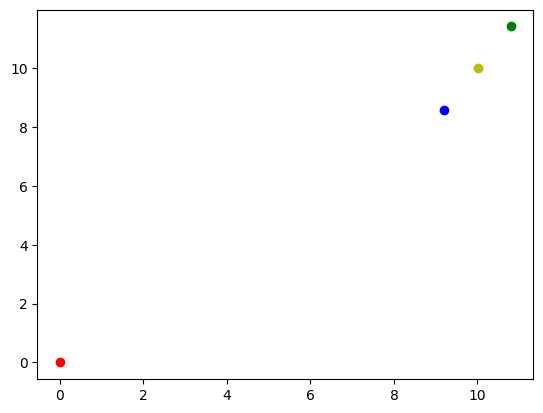

In [39]:
plt.scatter(0, 0, c='r')
k1_offset = np.array([[-1, 0, 0, -0.57],
                     [0, -1, 0, 0.61],
                     [0, 0, 1, 1],
                     [0, 0, 0, 1]])
world_100 = crying(0, 0, K_1, k1_offset@robot_pose)
world_158 = crying(1080/2, 1920/2 , K_1, k1_offset@robot_pose) # gets a point between the two corner points
world_1hw = crying(1080, 1920, K_1, k1_offset@robot_pose)
plt.scatter(world_100[0], world_100[1], c='g')
plt.scatter(world_158[0], world_158[1], c='y')
plt.scatter(world_1hw[0], world_1hw[1], c='b')

In [3]:
K = np.array([679.0616691224743, 0.0, 866.4845535612815, 0.0, 679.7611413287517, 593.4758325974849, 0.0, 0.0, 1.0]).reshape((3, 3))
# create a projection
pose = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 1, 1],
                 [0, 0, 0, 1]])


In [4]:
uv = np.array([0, 0, 1]).T
uv2 = np.array([866*2,593*2, 1]).T
world = np.linalg.inv(K)@uv
print(world)
world = np.linalg.inv(pose)@np.concatenate((world, np.array([1]))).T
print(world)

world2 = np.linalg.inv(K)@uv2
print(world2)
world2 = np.linalg.inv(pose)@np.concatenate((world2, np.array([1]))).T
print(world2)

[-1.27600274 -0.87306525  1.        ]
[-1.27600274 -0.87306525  0.          1.        ]
[1.27457562 0.87166525 1.        ]
[1.27457562 0.87166525 0.         1.        ]


In [5]:
w = np.array([-1.27600274, -0.87306525,  1]).T
px = K@w
print(px/px[-1])

[3.13203088e-06 1.80301299e-06 1.00000000e+00]
